In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [5]:
df.head(8)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N


In [7]:
# dataset's shape
df.shape

(614, 13)

In [8]:
# checking null value
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# impute null_value by feature's Mode value
#            these all attributes are categorical types

m = ['Gender','Married','Dependents','Credit_History','Self_Employed','Loan_Amount_Term',]
for i in m:
    df[i].fillna(df[i].mode()[0], inplace=True)


In [10]:
#  impute null value by Mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [11]:
#  unnecessary feature
df.drop('Loan_ID', axis=1, inplace=True)

In [12]:
#
df.describe()
# min & max value of some continuous type attributes are very huge differences
#

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [13]:
#
for i in m:
    print(df[i].value_counts())
    print('\n')
df['Loan_Status'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64


Yes    401
No     213
Name: Married, dtype: int64


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


1.0    525
0.0     89
Name: Credit_History, dtype: int64


No     532
Yes     82
Name: Self_Employed, dtype: int64


360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64




Y    422
N    192
Name: Loan_Status, dtype: int64

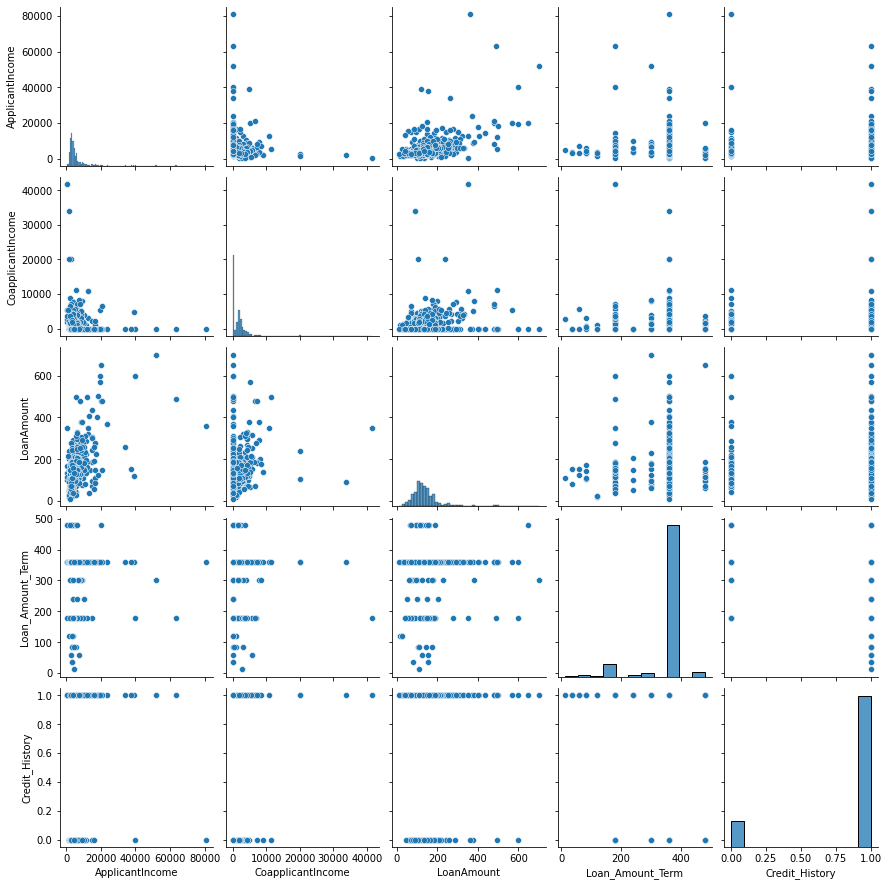

In [26]:
#  plotting pairplot 
sns.pairplot(df)

# maximum Attributes in this dataset is categorical types so pairplot look like this &

# now going to  plot seperate barplot /countplot/scatterplot to find relationship amongs Attributes  & understand the Attributes

<AxesSubplot:xlabel='Dependents', ylabel='count'>

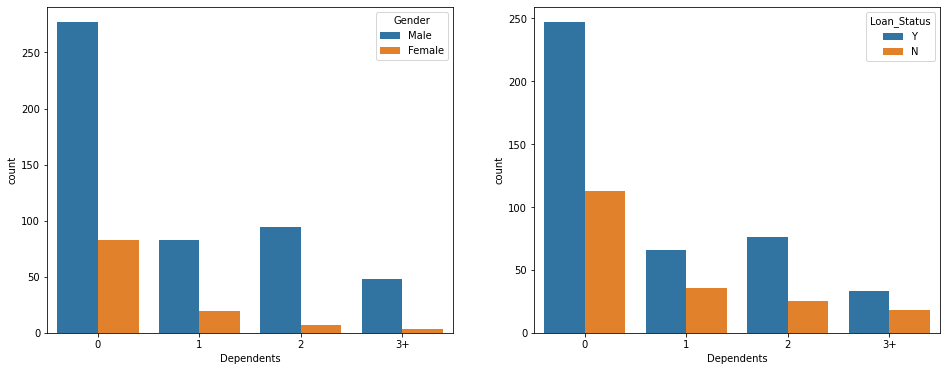

In [18]:
# plotting countplot 'Dependents' vs 'loan-status'
fig, axis= plt.subplots(1,2, figsize=(16,6))
sns.countplot(df['Dependents'], hue= df['Gender'], ax=axis[0])
sns.countplot(df['Dependents'], hue= df['Loan_Status'], ax=axis[1])
#
# the value of 'loan-status' is evenly distributed with the value of 'Dependents'  
#  

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

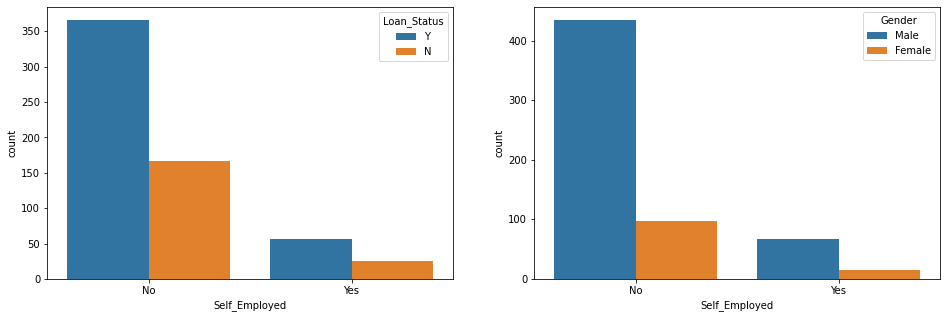

In [50]:
#  plotting countplot 'Self-employed' vs 'Loan-status'

fig, axis= plt.subplots(1,2, figsize=(16,5))
sns.countplot(df['Self_Employed'], hue= df['Loan_Status'], ax=axis[0])
sns.countplot(df['Self_Employed'], hue= df['Gender'], ax=axis[1])
#
# when 'self_employed' equal to 'No' then higher chances to 'Loan_status' = Yes


<AxesSubplot:xlabel='Credit_History', ylabel='count'>

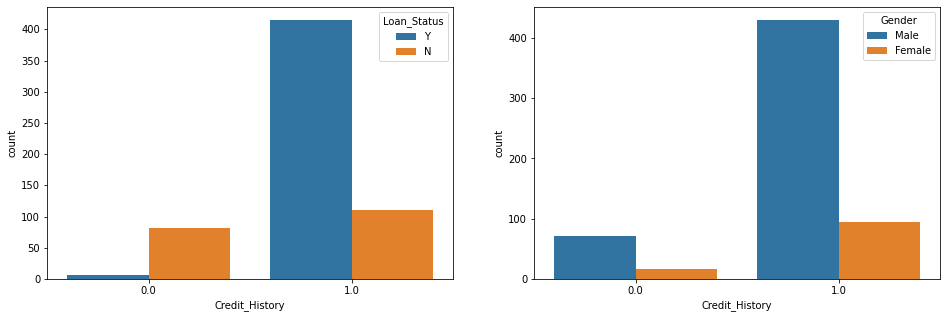

In [52]:

# plotting countplot 'Credit_History' vs 'Loan_Status'
fig, axis= plt.subplots(1,2, figsize=(16,5))
sns.countplot(df['Credit_History'], hue= df['Loan_Status'], ax=axis[0])
sns.countplot(df['Credit_History'], hue= df['Gender'], ax=axis[1])
#
#  Those who have zero 'Credit_History' , then no chances to get loan_status = Yes
# when 'Credit_history' equal to zero , then some chaances to get 'Loan_status'= No

<AxesSubplot:xlabel='Property_Area', ylabel='Loan_Status'>

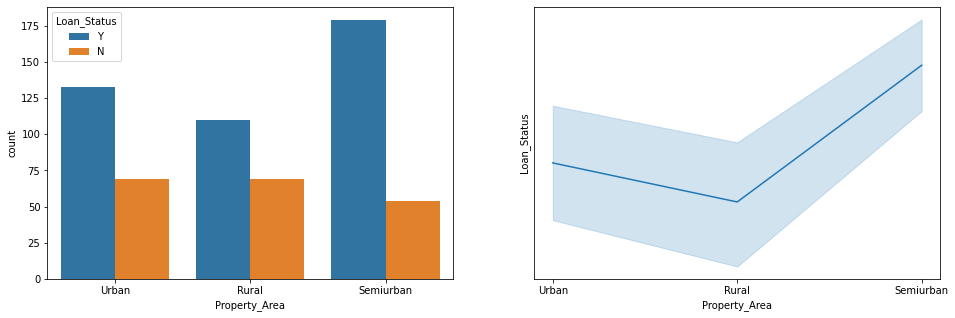

In [23]:
#  # plotting countplot 'Property_Area' vs 'Loan_Status'
fig, axis= plt.subplots(1,2, figsize=(16,5))
sns.countplot(df['Property_Area'], hue= df['Loan_Status'], ax=axis[0])
sns.lineplot(df['Property_Area'], df['Loan_Status'], ax=axis[1])
#
#  in 'Semiurban' area maximum 'Loan-status'= Yes, compare to another area

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

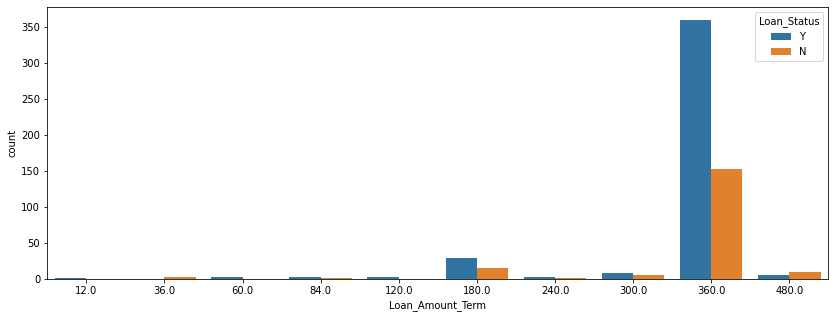

In [77]:
#  plotting countplot 'Loan_Amount_Term' vs 'Loan_Status'
plt.figure(figsize=(14,5))
sns.countplot(df['Loan_Amount_Term'] ,hue= df['Loan_Status'])
#  highest 'Loan_Amount_Term' is 360 months

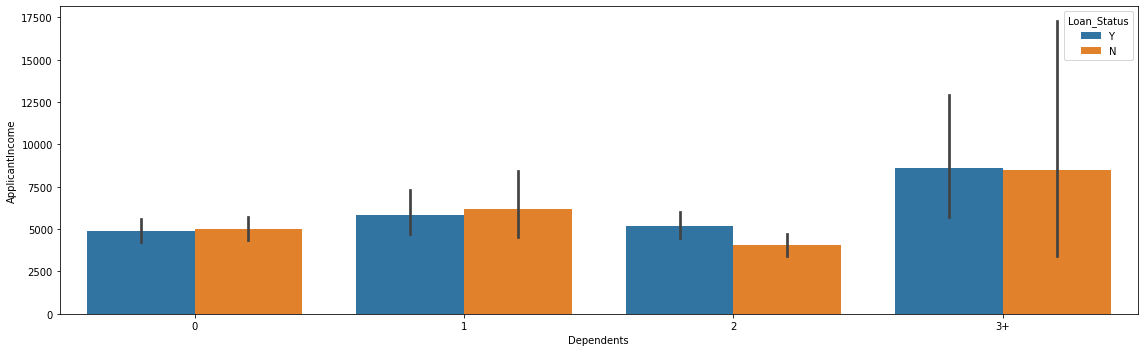

In [15]:
# 
plt.figure(figsize=(16,5))
sns.barplot(df['Dependents'] ,df['ApplicantIncome'],hue= df['Loan_Status'])
plt.show()
# the ApplicantIncome's data almost evenly distributed with all types Dependents variable

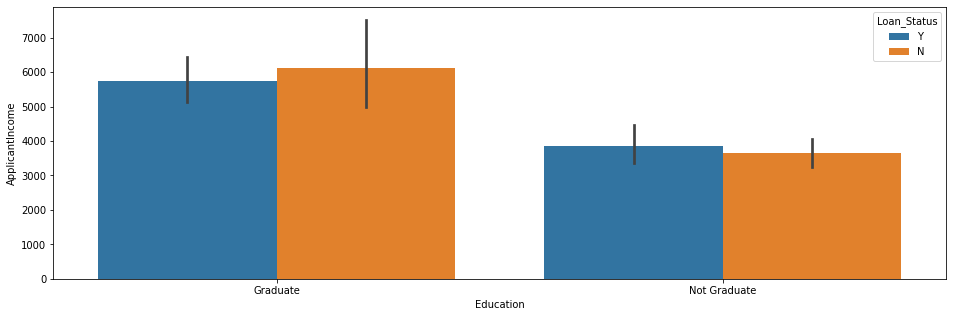

In [17]:
#  plotting Barplot of 'Education' vs 'ApplicantIncome'

plt.figure(figsize=(16,5))
sns.barplot(df['Education'] ,df['ApplicantIncome'],hue= df['Loan_Status'])
plt.show()
# maximum graduate type & graduate applicant some higher chances to loan-status=No, compare to 'Yes'
# Not-graduate applicant few more chances to loan-status = Yes, compare to 'No'

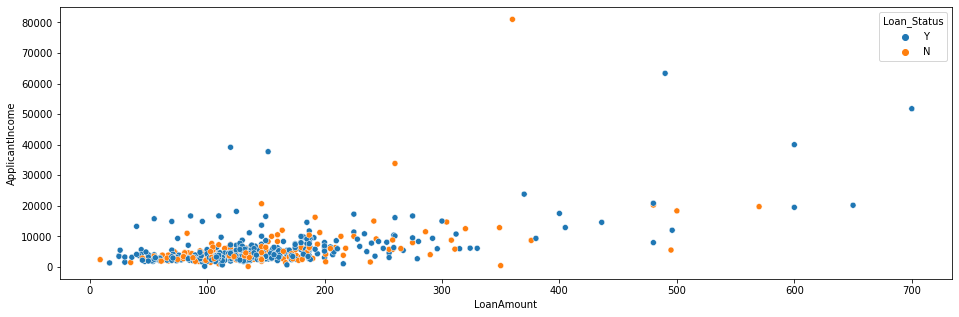

In [20]:
#  plotting Barplot of 'LoanAmount' vs 'ApplicantIncome'

plt.figure(figsize=(16,5))
sns.scatterplot(df['LoanAmount'] ,df['ApplicantIncome'],hue= df['Loan_Status'])
plt.show()

# Loan_Status's variable yes/No randomly distributed with 'LoanAmount','ApplicantIncome' 
#

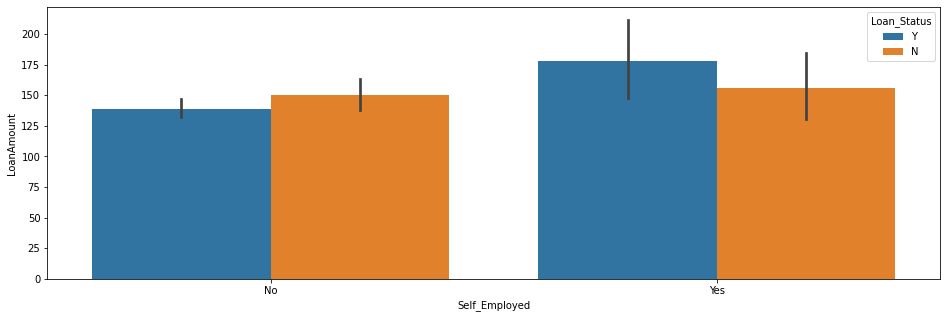

In [24]:
#  plotting Barplot of 'Self_Employed' vs 'LoanAmount'

plt.figure(figsize=(16,5))
sns.barplot(df['Self_Employed'] ,df['LoanAmount'],hue= df['Loan_Status'])
plt.show()
# 'Self_Employed' equal to Yes then some more chances to Loan_Status= Yes

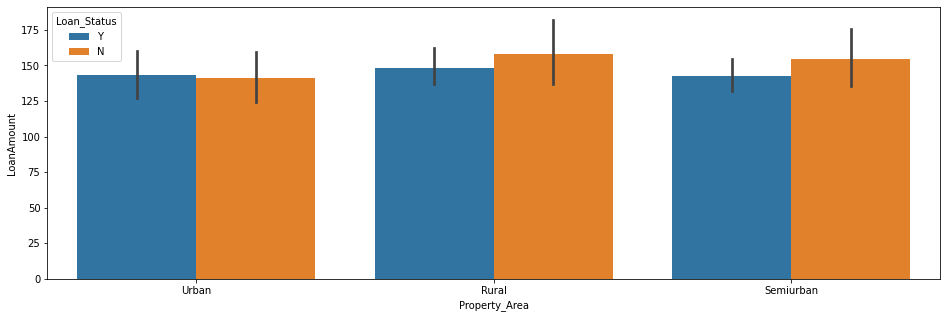

In [25]:
#  plotting Barplot of 'Self_Employed' vs 'LoanAmount'

plt.figure(figsize=(16,5))
sns.barplot(df['Property_Area'] ,df['LoanAmount'],hue= df['Loan_Status'])
plt.show()
# 'LoanAmount' data almost equally distributed with Property_Area variables (urban, Rural, Semiurban)

In [27]:
# APPLY LABEL-ENCODING

c= ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in c:
    df[i]= le.fit_transform(df[i])

<AxesSubplot:>

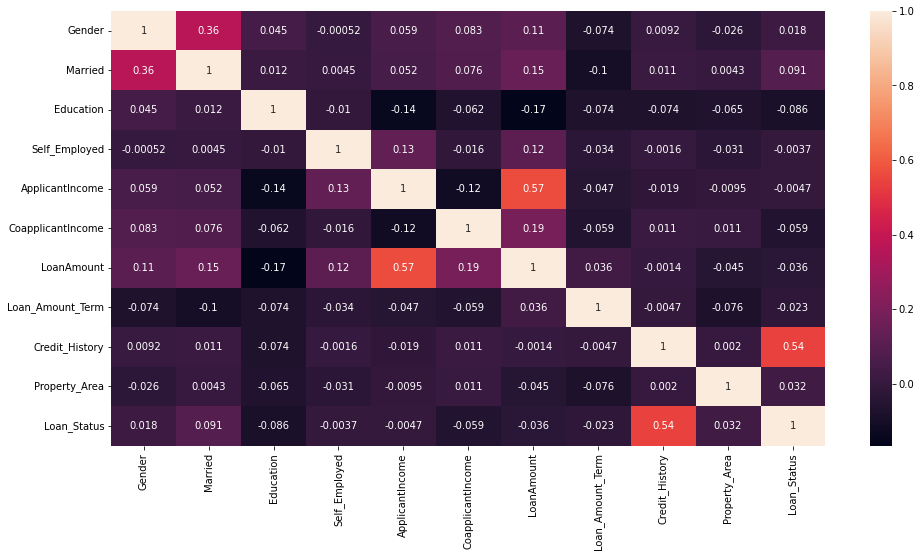

In [28]:

# PLOTTING DATASET_CORRELATION THROUGH  HEATMAP
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), annot=True)

#  no any features have positive correlated to target_featues 
#  all features are very less negative correlated to target-variable


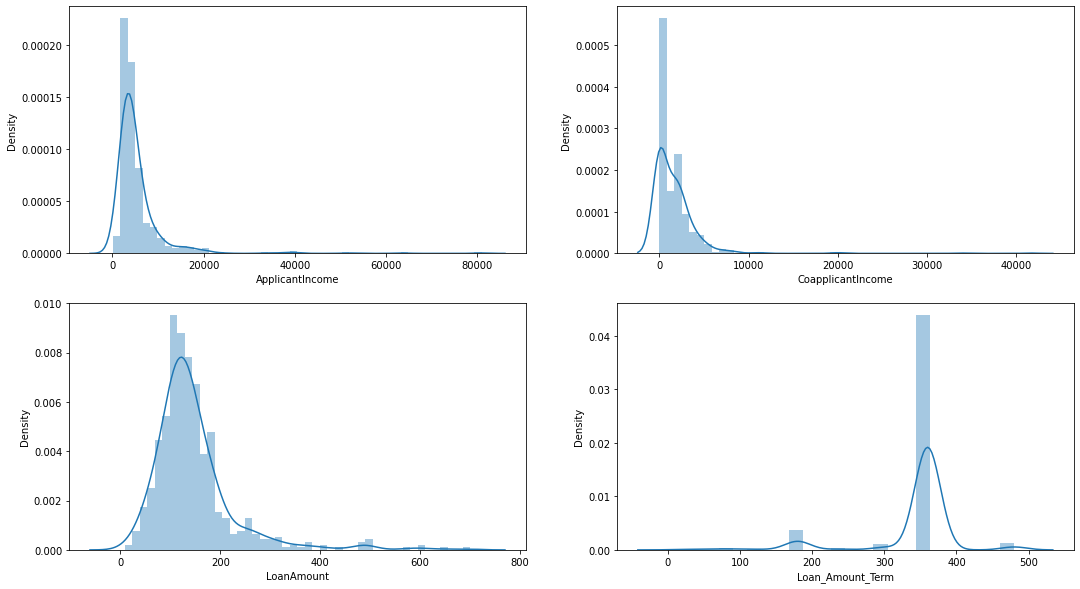

In [30]:

# lets see how is data distributed for every columns  / CHECK DATA IS NORMAAL DISTRIBUTED OR NOT

plt.figure(figsize=(18,10))
p=1
for col in df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]:
    if p <=15:
        ax = plt.subplot(2,2,p)
        sns.distplot(df[col])
        plt.xlabel=(col)
    p+=1    
plt.show()        

In [32]:
#
df['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [30]:
CHECKING SKEWNESS ON CONTINUOUS FEATURES

In [33]:
X= df[['ApplicantIncome','CoapplicantIncome','LoanAmount']]

X.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
dtype: float64

In [34]:
#  REMOVING skewness
for index in X.skew().index:
    if X.skew().loc[index]> 0.6:
        X[index]= np.log1p(X[index])


In [35]:
# checking skewness after removing skewness
X.skew()

ApplicantIncome      0.482128
CoapplicantIncome   -0.173073
LoanAmount          -0.179713
dtype: float64

In [36]:
#  

df[['ApplicantIncome','CoapplicantIncome','LoanAmount',]]= X[['ApplicantIncome','CoapplicantIncome','LoanAmount',]]

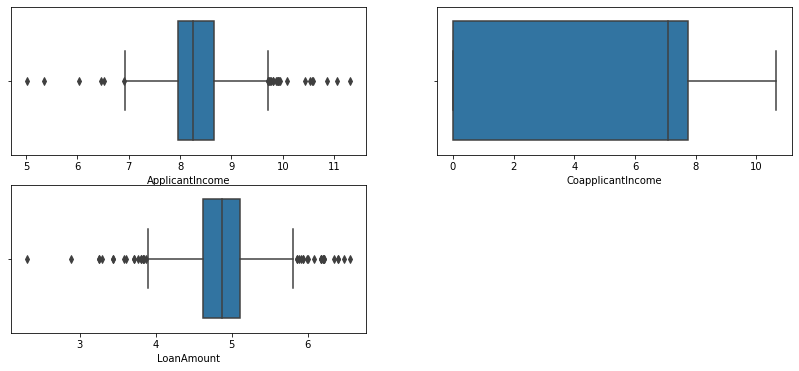

In [37]:
#   PLOTTING BOXPLOT TO CHECK OUTLIERS        
                                 # treating oultiers over continuous features
plt.figure(figsize=(14,6))
p= 1
for col in X:
    if p<=4:                                      
        ax=plt.subplot(2,2,p)                          
        sns.boxplot(X[col])
    p+=1                                   #  two  features have some outliers
plt.show()  
    

In [38]:
from scipy.stats import zscore

(np.abs(zscore(X))<3).all()

ApplicantIncome      False
CoapplicantIncome     True
LoanAmount           False
dtype: bool

In [39]:
# REMOVING  OUTLIER BY ZSCORE METHOD

from scipy.stats import zscore

z_scores=zscore(X)
df_new = df.loc[(abs(z_scores)<3).all(axis=1)]

print('original dataset shape', df.shape)
print('new dataset shape', df_new.shape)

original dataset shape (614, 12)
new dataset shape (596, 12)


In [40]:
df_new.head(3)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674197,0.000000,4.993232,360.0,1.0,2,1
1,1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1.0,0,0
2,1,1,0,0,1,8.006701,0.000000,4.204693,360.0,1.0,2,1


In [41]:
x= df_new.drop('Loan_Status', axis=1)

y= df_new.Loan_Status

In [42]:
# convert dependent value '3+' into 3 
x['Dependents'].astype('str')

x['Dependents'] = x['Dependents'].map({'0':0,'1':1,'2':2,'3+':3})

In [43]:
# make sure to multicollinearity is or not, use 'variance_inflation_factor' method to check  multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


features= x.columns
vif_value= [vif(x.values, i) for i in range(len(x.columns))]

pd.DataFrame({'features':features,'vif_value':vif_value})   #
#
#   ApplicantIncome & LoanAmount these two features are correlated with each other

,features,vif_value
0,Gender,6.664302
1,Married,4.022205
2,Dependents,1.813575
3,Education,1.291655
4,Self_Employed,1.187814
5,ApplicantIncome,215.147015
6,CoapplicantIncome,3.257526
7,LoanAmount,211.279851
8,Loan_Amount_Term,29.376104
9,Credit_History,6.857816


In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import *

In [47]:
# scaling the input attributes
sc= StandardScaler()
scaled= sc.fit_transform(x)

scaled= pd.DataFrame(scaled, columns=x.columns)

In [48]:
#        MAKE FUNCTION FOR BEST RANDOM_STATE
#                  IN TRAINING PROCESS           # finding best random_state
def max_score(model,scaled,y):
    maxf= 0
    rs= 0
    for r_state in range(50,150):
        x_train, x_test,y_train,y_test= train_test_split(scaled,y, test_size=0.30, random_state= r_state)

        model.fit(x_train,y_train)
        y_pred=model.predict(x_test)
        tmp=accuracy_score(y_test,y_pred)
        #print("random state :",r_state," and f1 score: ",tmp)
        
        if tmp>maxf:
            maxf=tmp
            rs=r_state
            print("maximum accuracy_score is at random state :",rs," and it is :",maxf)


In [65]:
#   MAKE FUNCTION FOR TRAIN & TEST THE MODEL
from sklearn.model_selection import cross_val_score as CVS
from sklearn.model_selection import KFold
kfold= KFold(n_splits=6, shuffle=True, random_state=459)


    
def model_score(model,xtrain,ytrain,x_test,y_test):
    model.fit(xtrain,ytrain)
    pred= model.predict(xtrain)
    y_pred= model.predict(x_test)
    print('training_score =', accuracy_score(ytrain,pred))
        
    print('test_accuracy_score=', accuracy_score(y_test,y_pred))
    print('classification_report \n', classification_report(y_test,y_pred))
    print('confusion_matrix \n', confusion_matrix(y_test,y_pred))
    print('roc_auc_score=',roc_auc_score(y_test, y_pred) )
    
def cross_val(model,xtrain,ytrain,algo):
        
    cv_score= CVS(model,xtrain,ytrain,cv= kfold,)
    print('cross_val_score with', algo,'=', cv_score.mean())
    

In [50]:
# let's use LogisticRegression

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()

max_score(lr,scaled,y)

maximum accuracy_score is at random state : 50  and it is : 0.7597765363128491
maximum accuracy_score is at random state : 51  and it is : 0.8268156424581006
maximum accuracy_score is at random state : 52  and it is : 0.8324022346368715
maximum accuracy_score is at random state : 54  and it is : 0.8379888268156425
maximum accuracy_score is at random state : 58  and it is : 0.8547486033519553
maximum accuracy_score is at random state : 80  and it is : 0.8659217877094972
maximum accuracy_score is at random state : 118  and it is : 0.8770949720670391


In [51]:
#  LOGISTIC REGRESSION
x_train, x_test,y_train,y_test= train_test_split(scaled,y, test_size=0.30, random_state= 80)
lr= LogisticRegression()
model_score(lr,x_train,y_train,x_test,y_test)

training_score = 0.7913669064748201
test_accuracy_score= 0.8659217877094972
classification_report 
               precision    recall  f1-score   support

           0       0.93      0.55      0.69        49
           1       0.85      0.98      0.91       130

    accuracy                           0.87       179
   macro avg       0.89      0.77      0.80       179
weighted avg       0.87      0.87      0.85       179

confusion_matrix 
 [[ 27  22]
 [  2 128]]
roc_auc_score= 0.767817896389325


In [55]:
#  LET'S USE  EXTRATREES-CLASSIFIER 
 
from sklearn.ensemble import ExtraTreesClassifier
TC = ExtraTreesClassifier(bootstrap=True,oob_score=True,)
max_score(TC ,scaled,y)

maximum accuracy_score is at random state : 50  and it is : 0.7430167597765364
maximum accuracy_score is at random state : 51  and it is : 0.8268156424581006
maximum accuracy_score is at random state : 67  and it is : 0.8379888268156425
maximum accuracy_score is at random state : 102  and it is : 0.8435754189944135
maximum accuracy_score is at random state : 118  and it is : 0.8491620111731844


In [58]:
x_train, x_test,y_train,y_test= train_test_split(scaled,y, test_size=0.30, random_state= 102)
model_score(TC,x_train,y_train,x_test,y_test)

training_score = 0.9976019184652278
test_accuracy_score= 0.8379888268156425
classification_report 
               precision    recall  f1-score   support

           0       0.92      0.57      0.71        61
           1       0.82      0.97      0.89       118

    accuracy                           0.84       179
   macro avg       0.87      0.77      0.80       179
weighted avg       0.85      0.84      0.83       179

confusion_matrix 
 [[ 35  26]
 [  3 115]]
roc_auc_score= 0.7741733814948597


In [56]:

#  LET'S USE SVM CLASSIFIER

from sklearn.svm import SVC
svm = SVC()
max_score(svm,scaled,y)

maximum accuracy_score is at random state : 50  and it is : 0.7597765363128491
maximum accuracy_score is at random state : 51  and it is : 0.8268156424581006
maximum accuracy_score is at random state : 52  and it is : 0.8324022346368715
maximum accuracy_score is at random state : 54  and it is : 0.8435754189944135
maximum accuracy_score is at random state : 58  and it is : 0.8603351955307262
maximum accuracy_score is at random state : 88  and it is : 0.8659217877094972
maximum accuracy_score is at random state : 118  and it is : 0.8770949720670391


In [57]:
#    SVC
x_train, x_test,y_train,y_test= train_test_split(scaled,y, test_size=0.30, random_state= 80)
model_score(svm,x_train,y_train,x_test,y_test)

training_score = 0.8033573141486811
test_accuracy_score= 0.8603351955307262
classification_report 
               precision    recall  f1-score   support

           0       0.90      0.55      0.68        49
           1       0.85      0.98      0.91       130

    accuracy                           0.86       179
   macro avg       0.88      0.76      0.80       179
weighted avg       0.87      0.86      0.85       179

confusion_matrix 
 [[ 27  22]
 [  3 127]]
roc_auc_score= 0.763971742543171


In [59]:
#  LET'S USE KNN CLASSIFIER

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
max_score(knn ,scaled,y)

maximum accuracy_score is at random state : 50  and it is : 0.7374301675977654
maximum accuracy_score is at random state : 51  and it is : 0.8044692737430168
maximum accuracy_score is at random state : 63  and it is : 0.8212290502793296
maximum accuracy_score is at random state : 67  and it is : 0.8268156424581006
maximum accuracy_score is at random state : 88  and it is : 0.8324022346368715
maximum accuracy_score is at random state : 112  and it is : 0.8435754189944135
maximum accuracy_score is at random state : 118  and it is : 0.8491620111731844


In [60]:
#  KNN CLASSIFIER
x_train, x_test,y_train,y_test= train_test_split(scaled,y, test_size=0.30, random_state= 118)
model_score(knn ,x_train,y_train,x_test,y_test)

training_score = 0.8009592326139089
test_accuracy_score= 0.8491620111731844
classification_report 
               precision    recall  f1-score   support

           0       0.81      0.54      0.65        46
           1       0.86      0.95      0.90       133

    accuracy                           0.85       179
   macro avg       0.83      0.75      0.78       179
weighted avg       0.84      0.85      0.84       179

confusion_matrix 
 [[ 25  21]
 [  6 127]]
roc_auc_score= 0.749182739457339


In [61]:
#  LET'S USE RANDOMFOERST CLASSIFIER

from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
max_score(rf,x,y)

maximum accuracy_score is at random state : 50  and it is : 0.7541899441340782
maximum accuracy_score is at random state : 51  and it is : 0.8100558659217877
maximum accuracy_score is at random state : 54  and it is : 0.8212290502793296
maximum accuracy_score is at random state : 58  and it is : 0.8268156424581006
maximum accuracy_score is at random state : 69  and it is : 0.8324022346368715
maximum accuracy_score is at random state : 102  and it is : 0.8491620111731844
maximum accuracy_score is at random state : 118  and it is : 0.8547486033519553


In [62]:
#  RANDOM FOREST CLASSIFIER
x_train, x_test,y_train,y_test= train_test_split(x,y, test_size=0.30, random_state= 118)

model_score(rf,x_train,y_train,x_test,y_test)

training_score = 1.0
test_accuracy_score= 0.8435754189944135
classification_report 
               precision    recall  f1-score   support

           0       0.75      0.59      0.66        46
           1       0.87      0.93      0.90       133

    accuracy                           0.84       179
   macro avg       0.81      0.76      0.78       179
weighted avg       0.84      0.84      0.84       179

confusion_matrix 
 [[ 27  19]
 [  9 124]]
roc_auc_score= 0.7596436744033997


In [63]:
#  LET'S USE GRADIENTBOOSTING CLASSIFIER

from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
max_score(gbc ,scaled,y)

maximum accuracy_score is at random state : 50  and it is : 0.7318435754189944
maximum accuracy_score is at random state : 51  and it is : 0.7821229050279329
maximum accuracy_score is at random state : 52  and it is : 0.8212290502793296
maximum accuracy_score is at random state : 62  and it is : 0.8268156424581006
maximum accuracy_score is at random state : 80  and it is : 0.8379888268156425
maximum accuracy_score is at random state : 138  and it is : 0.8491620111731844


In [64]:
x_train, x_test,y_train,y_test= train_test_split(scaled,y, test_size=0.30, random_state= 80)
model_score(gbc ,x_train,y_train, x_test,y_test)

training_score = 0.8968824940047961
test_accuracy_score= 0.8379888268156425
classification_report 
               precision    recall  f1-score   support

           0       0.78      0.57      0.66        49
           1       0.85      0.94      0.89       130

    accuracy                           0.84       179
   macro avg       0.82      0.75      0.78       179
weighted avg       0.83      0.84      0.83       179

confusion_matrix 
 [[ 28  21]
 [  8 122]]
roc_auc_score= 0.7549450549450548


In [66]:
#  CROSS-VALIDATION 

x_train, x_test,y_train,y_test= train_test_split(scaled ,y, test_size=0.30, random_state= 80)
cross_val(gbc,x_train,y_train,'GradientBoosting')           ## CROSS-VALIDATION WITH  GRADIENTBOOSTING
print('-'*15)

#  
x_train, x_test,y_train,y_test= train_test_split(scaled,y, test_size=0.30, random_state= 53)
cross_val(svm ,x_train,y_train,'SVM_classifier')                  ##  CROSS-VALIDATION WITH SVM CLASSIFIERS
print('-'*15)

# 
x_train, x_test,y_train,y_test= train_test_split(scaled,y, test_size=0.30, random_state= 54)
cross_val(knn ,x_train,y_train,'KNN_classifier')                 ## Cross_Validation with KNN Classifiers
print('-'*15)

#  
x_train, x_test,y_train,y_test= train_test_split(x ,y, test_size=0.30, random_state= 54)
cross_val(rf,x_train,y_train,'RandomForest_classifier')             ##  cross_validation with RandomForest Classifier

cross_val_score with GradientBoosting = 0.7434092477570738
---------------
cross_val_score with SVM_classifier = 0.8249827467218771
---------------
cross_val_score with KNN_classifier = 0.7792270531400965
---------------
cross_val_score with RandomForest_classifier = 0.7791580400276051


In [67]:
#  HYPERPARAMATER TUNING                   '''' RANDOMFOREST-classification''''
from sklearn.model_selection import GridSearchCV

x_train, x_test,y_train,y_test= train_test_split(x,y, test_size=0.30, random_state= 54)
param= {'n_estimators':[100,180, 280],'max_depth':[6,8,9,10] ,'min_samples_split':[2,3],'min_samples_leaf':[1,2,3] }
gcv = GridSearchCV(rf ,param, cv=kfold,)

gcv.fit(x_train,y_train)
print('best_parameter=', gcv.best_params_ ,'\n')


G_RF = gcv.best_estimator_
G_RF.fit(x_train, y_train)
pred = G_RF.predict(x_test)

print('accuracy_score=', accuracy_score(y_test, pred))
print('classification_report \n ', classification_report(y_test, pred), '\n')
print('roc_auc_score =', roc_auc_score(y_test, pred))


best_parameter= {'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100} 

accuracy_score= 0.8435754189944135
classification_report 
                precision    recall  f1-score   support

           0       0.93      0.49      0.64        51
           1       0.83      0.98      0.90       128

    accuracy                           0.84       179
   macro avg       0.88      0.74      0.77       179
weighted avg       0.86      0.84      0.83       179
 

roc_auc_score = 0.7372855392156863


In [71]:
#   HYPERPARAMATER TUNING                   '''' SVM-classification''''

svm= SVC()
x_train, x_test,y_train,y_test= train_test_split(scaled,y, test_size=0.30, random_state= 88)
param= {'C':[1,2,3], 'degree':[2,3,4], 'kernel':['poly','rbf','linear'] }
grid_sv = GridSearchCV(svm ,param, cv=kfold,)
grid_sv.fit(x_train,y_train)
print('best_parameter=', grid_sv.best_params_ ,'\n')


#GBC = gcv.best_estimator_
#GBC.fit(x_train, y_train)
pred1 = grid_sv.predict(x_test)

print('accuracy_score=', accuracy_score(y_test, pred1))
print('classification_report \n ', classification_report(y_test, pred1), '\n')
print('roc_auc_score =', roc_auc_score(y_test, pred1))


best_parameter= {'C': 1, 'degree': 2, 'kernel': 'poly'} 

accuracy_score= 0.8603351955307262
classification_report 
                precision    recall  f1-score   support

           0       1.00      0.46      0.63        46
           1       0.84      1.00      0.91       133

    accuracy                           0.86       179
   macro avg       0.92      0.73      0.77       179
weighted avg       0.88      0.86      0.84       179
 

roc_auc_score = 0.7282608695652174


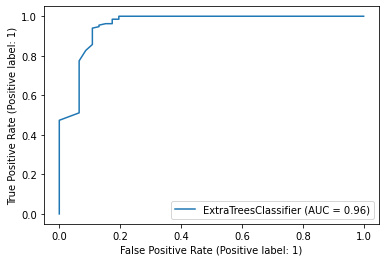

In [75]:
# plotting roc_curve of 'EXTRATREES CLASSIFIER'

plot_roc_curve(TC, x_test,y_test)

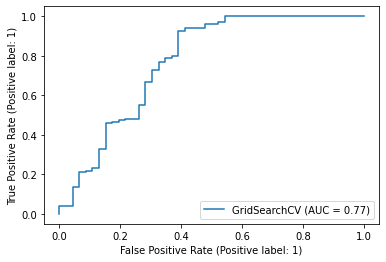

In [72]:

# plotting roc_curve of 'SVM CLASSIFIER'

plot_roc_curve(grid_sv, x_test,y_test)

In [76]:
import pickle

In [80]:
#
Loan_Application = 'Loan_Application.pickle'

pickle.dump(grid_sv,open(Loan_Application, 'wb'))

#
model= pickle.load(open(Loan_Application, 'rb'))